<a href="https://colab.research.google.com/github/SuKay712/LearnPyTorch/blob/main/01_pytorch_workflow_theory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Pytorch_WorkFlow


In [2]:
import torch
from torch import nn
import matplotlib.pyplot as plt
#check pytorch verion
torch.__version__

'2.0.1+cu118'

In [3]:
weigth = 0.7
bias = 0.3
#create
start = 0
end = 1
step =0.02
x = torch.arange(start, end, step).unsqueeze(dim = 1)
y = weigth * x + bias
x[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [4]:
len(x), len(y)

(50, 50)

##split data into training and test sets

In [5]:
#create a train/test split
train_split = int(0.8 * len(x))
x_train, y_train = x[:train_split], y[:train_split]
x_test, y_test = x[train_split:], y[train_split:]
len(x_train), len(x_test), len(y_train), len(y_test)

(40, 10, 40, 10)

##Visualize data

In [6]:
def plot_predictions ( train_data = x_train,
                    train_labels = y_train,
                     test_data = x_test,
                     test_labels = y_test,
                     predictions = None):
  plt.figure(figsize = (10, 7))


  ##Plot training data, test data and compare predictions

  #plot data in blue
  plt.scatter(train_data, train_labels, c = "b", s = 4, label = "Trainning data")
    #plot data in green
  plt.scatter(test_data, test_labels, c = "g", s = 4, label = "Test data")
  if predictions is not None:
    plt.scatter(test_data, predictions, c = "r", s= 4, label = "Predictions")

  #show legend
  plt.legend(prop={"size": 14})

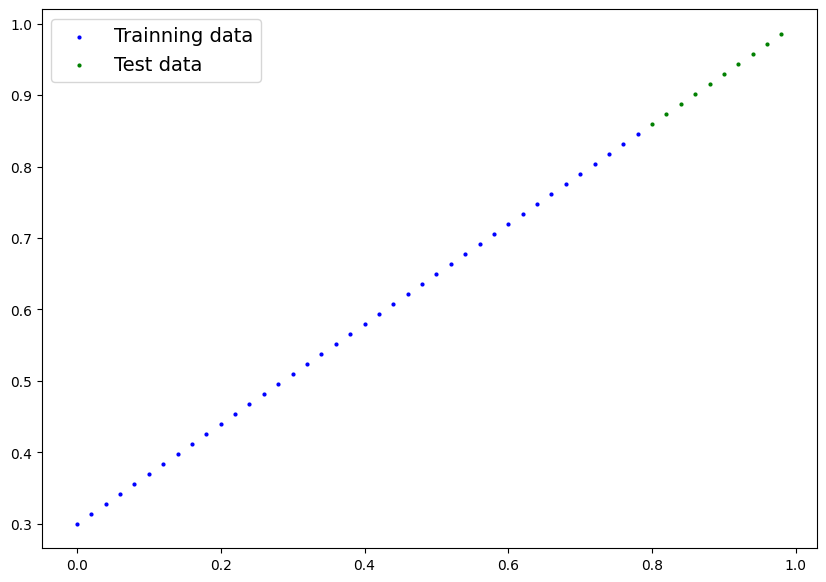

In [7]:
plot_predictions()

##Build Model
two algorithm:
1.gradient descent
2.backpropagation

In [8]:
#create linear regression model class
class LinearRegressionModule(nn.Module): # ke thua tat ca tu nn.module cho pytorch
    def __init__(self) :
        super().__init__()
        self.weights = nn.Parameter(  torch.rand(1,
                                                        requires_grad = True,
                                                        dtype = torch.float))

        self.bias = nn.Parameter(torch.rand(1,
                                           requires_grad = True,
                                           dtype = torch.float))

        #forward method to defind the computation in the model
    def forward(self, x: torch.Tensor) ->torch.Tensor:
        return self.weights *x + self.bias #day la linear regression fomula




In [9]:
#create a random seed
torch.manual_seed(42)
#create an instance of the model( this is a subclass of nn.module)
model_0 = LinearRegressionModule()
model_0
#check out the parameter
list(model_0.parameters())


[Parameter containing:
 tensor([0.8823], requires_grad=True),
 Parameter containing:
 tensor([0.9150], requires_grad=True)]

In [10]:
#list named paratmeters
model_0.state_dict()

OrderedDict([('weights', tensor([0.8823])), ('bias', tensor([0.9150]))])

In [11]:
y_preds = model_0(x_test)
y_preds

tensor([[1.6208],
        [1.6385],
        [1.6561],
        [1.6738],
        [1.6914],
        [1.7090],
        [1.7267],
        [1.7443],
        [1.7620],
        [1.7796]], grad_fn=<AddBackward0>)

### Making prediction using `torch.inference_mode()`
To check our model 's predictive power, let's see how well it predicts`y_test` based on `x_test`



In [12]:
#make predictions with model
with torch.inference_mode(): ##or torch.no_grad()
  y_preds = model_0(x_test)
y_preds

tensor([[1.6208],
        [1.6385],
        [1.6561],
        [1.6738],
        [1.6914],
        [1.7090],
        [1.7267],
        [1.7443],
        [1.7620],
        [1.7796]])

In [13]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

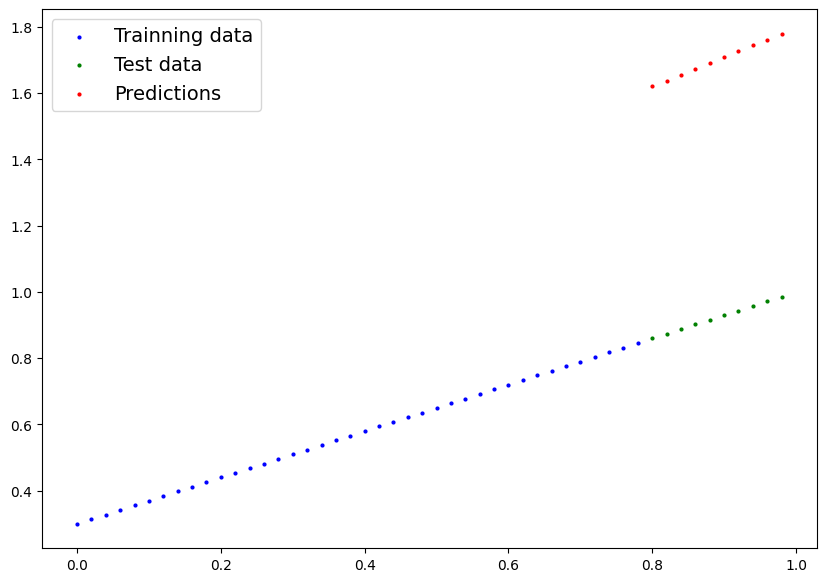

In [14]:
plot_predictions(predictions = y_preds)

##3. Train model
the

In [15]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.8823], requires_grad=True),
 Parameter containing:
 tensor([0.9150], requires_grad=True)]

In [16]:
## create Loss function
loss_function = nn.L1Loss()
##setup an optimizer
optimizer = torch.optim.SGD ( params = model_0.parameters(),
                            lr= 0.01)

In [17]:
with torch.no_grad():
    list(model_0.parameters())

#building training loop

In [18]:
#epochs
epochs = 100
for epoch in range(epochs):
    #set model to training mode
    model_0.train()# train mode in pytorch set all par
    #1. forward pass
    y_pred = model_0(x_train)
    #2. calcut the loss
    loss = loss_function(y_pred, y_train)
    print(f"lost: {loss} ")
    #3 optimizer zero grad
    optimizer.zero_grad()
    #4 perform backpropagation on the loss with the respect to the parameters of the model
    loss.backward()
    #5 step the optimizer(perform grad descent)
    optimizer.step()
    ##testing
    model_0.eval() #turn off gradient tracking
    with torch.inference_mode():
        #do the forward pass
        test_pred = model_0(x_test)
        #2. calculate the loss
        test_loss = loss_function(test_pred, y_test)
    if epoch %10 == 0:
        print(f"epoch: {epoch} | loss: {loss} |Test loss: {test_loss}")
        print(model_0.state_dict())


lost: 0.6860889196395874 
epoch: 0 | loss: 0.6860889196395874 |Test loss: 0.7637526988983154
OrderedDict([('weights', tensor([0.8784])), ('bias', tensor([0.9050]))])
lost: 0.6745679974555969 
lost: 0.6630470156669617 
lost: 0.6515260338783264 
lost: 0.6400049924850464 
lost: 0.6284840703010559 
lost: 0.6169630289077759 
lost: 0.6054420471191406 
lost: 0.5939210653305054 
lost: 0.5824000239372253 
lost: 0.5708791017532349 
epoch: 10 | loss: 0.5708791017532349 |Test loss: 0.6290428042411804
OrderedDict([('weights', tensor([0.8394])), ('bias', tensor([0.8050]))])
lost: 0.5593580603599548 
lost: 0.5478371381759644 
lost: 0.5363161563873291 
lost: 0.5247951149940491 
lost: 0.5132741332054138 
lost: 0.5017532110214233 
lost: 0.4902321696281433 
lost: 0.47871121764183044 
lost: 0.4671902060508728 
lost: 0.45566922426223755 
epoch: 20 | loss: 0.45566922426223755 |Test loss: 0.4943329691886902
OrderedDict([('weights', tensor([0.8004])), ('bias', tensor([0.7050]))])
lost: 0.4441482126712799 
los

In [19]:
with torch.inference_mode():
    y_preds_new = model_0(x_test)
y_preds_new

tensor([[0.8661],
        [0.8801],
        [0.8940],
        [0.9080],
        [0.9220],
        [0.9359],
        [0.9499],
        [0.9638],
        [0.9778],
        [0.9917]])

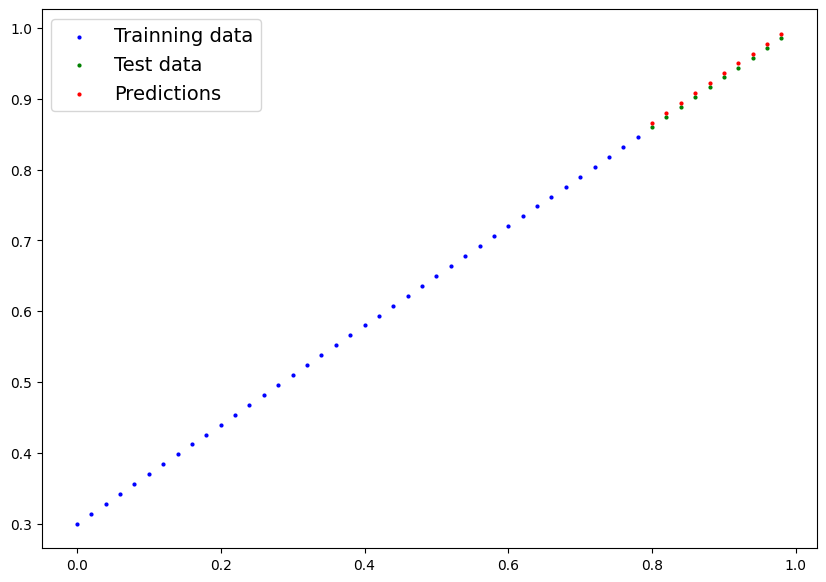

In [20]:
plot_predictions(predictions = y_preds_new)

In [21]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6977])), ('bias', tensor([0.3080]))])

In [22]:
weigth, bias


(0.7, 0.3)

## Saving a model

In [23]:
#saving your model
from pathlib import Path
#.create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True, exist_ok = True)
#create models save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
MODEL_SAVE_PATH
#save the model state dict
print(f"saving mode to : {MODEL_SAVE_PATH}")
torch.save(obj = model_0, f = MODEL_SAVE_PATH)


saving mode to : models/01_pytorch_workflow_model_0.pth


In [24]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1783 Sep 20 07:29 01_pytorch_workflow_model_0.pth


##Load a models

In [25]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6977])), ('bias', tensor([0.3080]))])

In [26]:
#to load in a save state_dict we have to instanttiate a new instance of outr model class
loaded_model_0 = LinearRegressionModule()

loaded_model_0.load_state_dict(torch.load(f = MODEL_SAVE_PATH).state_dict())

<All keys matched successfully>

In [27]:
loaded_model_0.state_dict()


OrderedDict([('weights', tensor([0.6977])), ('bias', tensor([0.3080]))])

In [28]:
x_test

tensor([[0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])

In [29]:
#make some predictions
loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(x_test)
loaded_model_preds

tensor([[0.8661],
        [0.8801],
        [0.8940],
        [0.9080],
        [0.9220],
        [0.9359],
        [0.9499],
        [0.9638],
        [0.9778],
        [0.9917]])

In [30]:
#compare loaded model preds with original model preds
y_preds == loaded_model_preds

tensor([[False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False]])

In [31]:
#make som models preds
model_0.eval()
with torch.inference_mode():
    y_preds = model_0(x_test)
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

##6 putting it all together


In [32]:
import torch
from torch import nn
import matplotlib.pyplot as plt
torch.__version__


'2.0.1+cu118'

In [33]:
## create device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"using {device}")

using cuda


#6.1 Data


In [34]:
#create some data
weight = 0.7
bias = 0.3
#create range value
start = 0
end = 1
step = 0.02
#create x and y
x = torch.arange(start, end, step).unsqueeze(dim = 1)
y = weight*x + bias
x[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [35]:
#split data
train_split = int(0.8 * len(x))
x_train, y_train = x[:train_split], y[:train_split]
x_test, y_test = x[train_split:], y[train_split:]
len(x_train), len(y_train), len(x_test), len(y_test)


(40, 40, 10, 10)

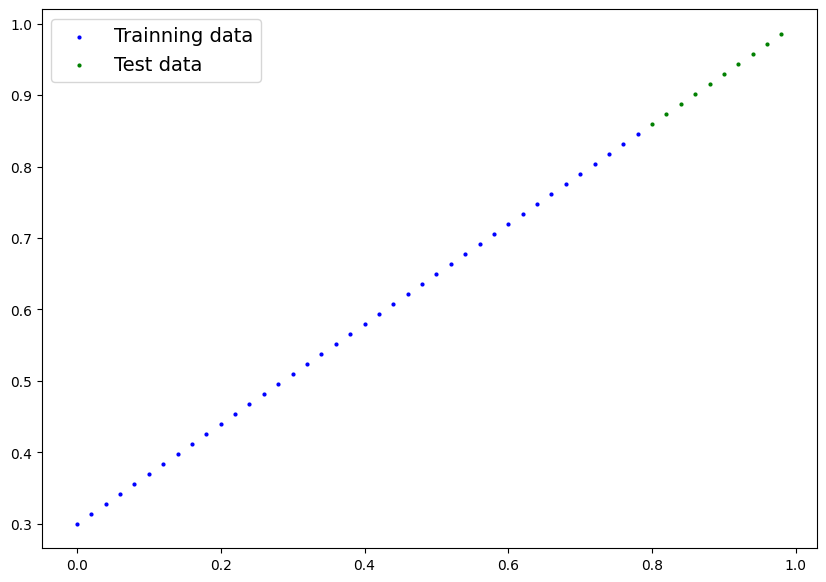

In [36]:
#plot
plot_predictions(x_train, y_train, x_test, y_test)


In [40]:
#create a linear model by subclass nn.Model
class LinearRegressionModuleV2(nn.Module):
    def __init__(self):
        super().__init__()
        #use linear() for create the model parameter
        self.linear_layer = nn.Linear(in_features=1,
                                      out_features = 1)

        #forward method to defind the computation in the model
    def forward(self, x: torch.Tensor) ->torch.Tensor:
        return self.linear_layer(x)

In [41]:
torch.manual_seed(42)
model = LinearRegressionModuleV2()
model, model.state_dict()

(LinearRegressionModuleV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [47]:
x_train, y_train, model.parameters()

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [

In [43]:
#check the model current device
next(model.parameters()).device

device(type='cpu')

In [46]:
#set the model to use the target device
model.to(device)
next(model.parameters()).device

device(type='cuda', index=0)

##6.3 trainning

In [50]:
#training
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params = model.parameters(),  lr = 0.01)

In [51]:
#let's write a training loop
torch.manual_seed(42)
epochs = 200

#put the data on the target device
x_train = x_train.to(device)
y_train = y_train.to(device)
x_test = x_test.to(device)
y_test  = y_test.to(device)
for epoch in range(epochs):
    model.train()
    #1. forward pass
    y_pred = model(x_train)
    #2. loss
    loss = loss_fn(y_pred, y_train)
    #3. optimizer zero grad
    optimizer.zero_grad()
    #4. perform backpropagation
    loss.backward()
    #5.optimizer step
    optimizer.step()

    ##Testing
    model.eval()
    with torch.inference_mode():
        test_pred = model(x_test)
        loss = loss_fn(test_pred, y_test)
        #print out whats happening
    if epoch % 10 == 0:
        print(f"epoch: {epoch} |loss: {loss} | test loss: {test_loss}" )

epoch: 0 |loss: 0.5739762187004089 | test loss: 0.005930870771408081
epoch: 10 |loss: 0.4392664134502411 | test loss: 0.005930870771408081
epoch: 20 |loss: 0.30455657839775085 | test loss: 0.005930870771408081
epoch: 30 |loss: 0.16984669864177704 | test loss: 0.005930870771408081
epoch: 40 |loss: 0.03513690456748009 | test loss: 0.005930870771408081
epoch: 50 |loss: 0.04784907028079033 | test loss: 0.005930870771408081
epoch: 60 |loss: 0.045803118497133255 | test loss: 0.005930870771408081
epoch: 70 |loss: 0.037530567497015 | test loss: 0.005930870771408081
epoch: 80 |loss: 0.02994490973651409 | test loss: 0.005930870771408081
epoch: 90 |loss: 0.02167237363755703 | test loss: 0.005930870771408081
epoch: 100 |loss: 0.014086711220443249 | test loss: 0.005930870771408081
epoch: 110 |loss: 0.005814164876937866 | test loss: 0.005930870771408081
epoch: 120 |loss: 0.013801801018416882 | test loss: 0.005930870771408081
epoch: 130 |loss: 0.013801801018416882 | test loss: 0.005930870771408081
ep

In [52]:
model.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

##6.4 Making and evaluating predictions


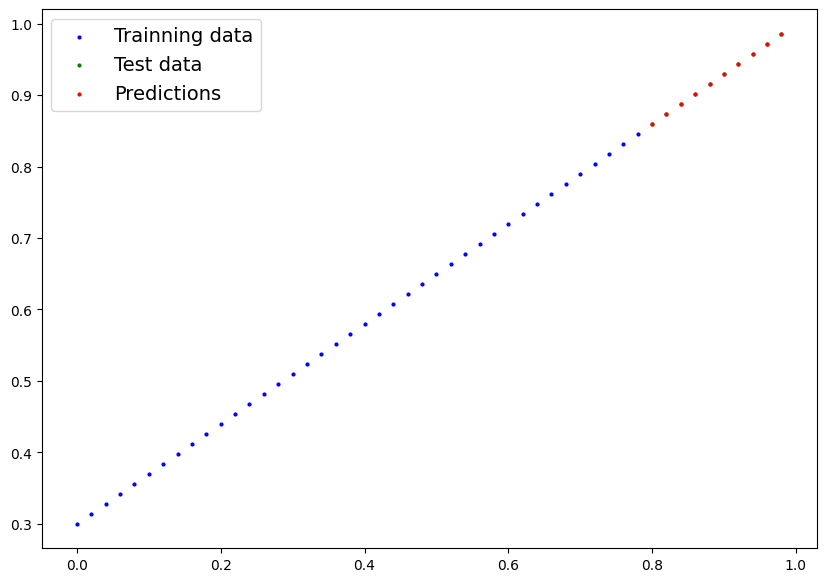

In [55]:
#turn model into evalutation mode
model.eval()
with torch.inference_mode():
    y_preds = model(x_test)
plot_predictions(predictions = y_preds.cpu())

###6.5 Saving & loading a trained model


In [59]:
from pathlib import Path
#1.create models directory
MODEL_PATH =  Path("models")
MODEL_PATH.mkdir(parents = True, exist_ok = True)
#2. create model save path
MODEL_NAME = "01_pytorch_workflow_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
#3. save the model state dict
print(f"saving model to :{MODEL_SAVE_PATH}")
torch.save(obj = model.state_dict(), f = MODEL_SAVE_PATH)

saving model to :models/01_pytorch_workflow_model.pth


In [60]:
#load a pytorch
loaded_model = LinearRegressionModuleV2()
loaded_model.load_state_dict(torch.load(MODEL_SAVE_PATH))
#put the loaded to device
loaded_model.to(device)

LinearRegressionModuleV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [61]:
next(loaded_model.parameters()).device

device(type='cuda', index=0)

In [62]:
loaded_model.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')

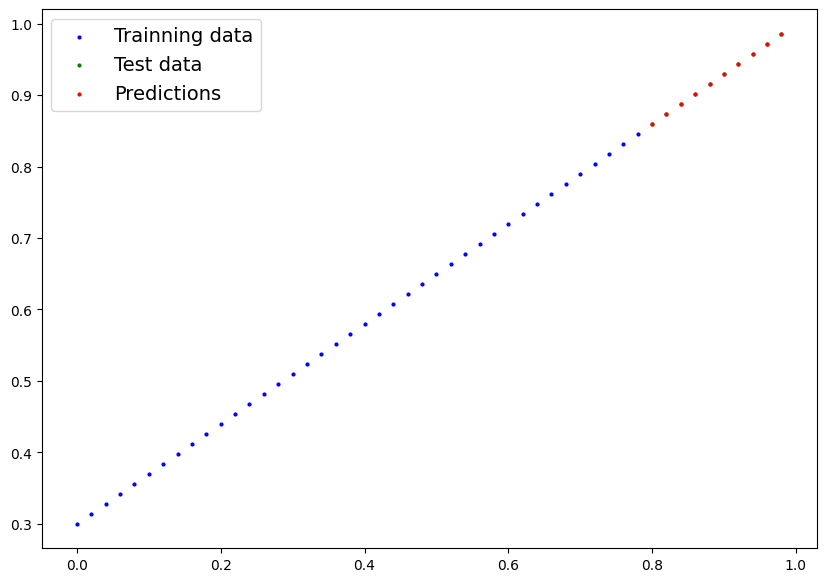

In [66]:
#evaluate loaded model
loaded_model.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model(x_test)
plot_predictions(predictions = loaded_model_preds.cpu())
y_preds == loaded_model_preds